In [ ]:
#Input section
'''

'''

In [ ]:
area = (76.69 * 38.7)/(39.37*39.37)
area

1.9147799585921756

In [ ]:
50000000/315

158730.15873015873

In [ ]:
190000*315

59850000

In [ ]:
190000*1.9

361000.0

In [ ]:
1024*0.15*361000

55449600.0

In [ ]:
# To extract weather report on any given location
import pandas as pd
from datetime import date
from lxml import html 
import requests   

datelist = pd.date_range(date.today(), periods=8).tolist()
dates = []

for i in range(len(datelist)):
  dates.append(str(datelist[i])[:10]) 
final_days = []

for i in range(len(dates)):
  days = ''
  for j in dates[i]:
    if j != '-':
      days = days + j
  final_days.append(days)

country = "India" # Enter the country name
city = "kurnool" # Enter the city name 
url = f"https://www.timeanddate.com/weather/{country}/{city}/hourly?hd="
links = []

for i in range(len(final_days)):
  links.append(url+final_days[i]) 

total_df = pd.DataFrame({'Date': pd.Series(dtype='string'), 'Time': pd.Series(dtype='string'),'Temperature': pd.Series(dtype='string'), 'Weather': pd.Series(dtype='string'),
                          'Wind': pd.Series(dtype='string'),  'Humidity': pd.Series(dtype='string'), 'Precipitation': pd.Series(dtype='string')}) 
for i in range(len(links)):
  my_url = links[i]
  resp = requests.get(my_url)
  tree = html.fromstring(resp.content) 
  cur_time = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/th/text()')
  temperature = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[2]//text()')
  weather = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[3]//text()')
  wind = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[5]//text()')
  humidity = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[7]//text()')
  precipitation = tree.xpath('//*[@id="wt-hbh"]/tbody/tr[*]/td[8]//text()')
  weather_df = pd.DataFrame({'Time': cur_time, 'Temperature': temperature, 'Weather': weather,  'Wind': wind, 'Humidity': humidity, 'Precipitation': precipitation}) 
  weather_df["Date"] = dates[i] 
  temp_cols = weather_df.columns.tolist()
  new_cols = temp_cols[-1:] + temp_cols[:-1]
  weather_df = weather_df[new_cols] 
  if i == 0:
    total_df = weather_df 
  else:
    total_df = total_df.append(weather_df, ignore_index = True)  
total_df  

,Date,Time,Temperature,Weather,Wind,Humidity,Precipitation
0,2023-02-18,1:00 pm,94 °F,Sunny.,6 mph,23%,0%
1,2023-02-18,2:00 pm,94 °F,Sunny.,6 mph,21%,0%
2,2023-02-18,3:00 pm,95 °F,Sunny.,6 mph,20%,0%
3,2023-02-18,4:00 pm,95 °F,Sunny.,6 mph,20%,0%
4,2023-02-18,5:00 pm,93 °F,Sunny.,5 mph,20%,0%
...,...,...,...,...,...,...,...
187,2023-02-25,8:00 am,74 °F,Sunny.,6 mph,65%,0%
188,2023-02-25,9:00 am,80 °F,Mostly sunny.,6 mph,53%,0%
189,2023-02-25,10:00 am,85 °F,Mostly sunny.,7 mph,43%,0%
190,2023-02-25,11:00 am,88 °F,Mostly sunny.,8 mph,36%,0%


In [ ]:
reqhour = []
for i in range(len(total_df)):
  if total_df.iloc[i,1][-2:] =='am': 
    tim = total_df.iloc[i,1][0:2]  
    if tim[-1] == ':': 
      tim = str('0'+tim[0])
    reqhour.append(tim) 
  if total_df.iloc[i,1][-2:] =='pm':
    tim = total_df.iloc[i,1][0:2]
    if tim[-1] == ':' and tim != '12': 
      tim = str(int(tim[0])+12)
    if tim == '12': 
      tim = str(tim)
    reqhour.append(tim) 
total_df.insert(7,"hours",reqhour) 
total_df

,Date,Time,Temperature,Weather,Wind,Humidity,Precipitation,hours
0,2023-02-18,1:00 pm,94 °F,Sunny.,6 mph,23%,0%,13
1,2023-02-18,2:00 pm,94 °F,Sunny.,6 mph,21%,0%,14
2,2023-02-18,3:00 pm,95 °F,Sunny.,6 mph,20%,0%,15
3,2023-02-18,4:00 pm,95 °F,Sunny.,6 mph,20%,0%,16
4,2023-02-18,5:00 pm,93 °F,Sunny.,5 mph,20%,0%,17
...,...,...,...,...,...,...,...,...
187,2023-02-25,8:00 am,74 °F,Sunny.,6 mph,65%,0%,08
188,2023-02-25,9:00 am,80 °F,Mostly sunny.,6 mph,53%,0%,09
189,2023-02-25,10:00 am,85 °F,Mostly sunny.,7 mph,43%,0%,10
190,2023-02-25,11:00 am,88 °F,Mostly sunny.,8 mph,36%,0%,11


In [ ]:
import numpy as np 
wind = [int(s[:2]) for s in list(total_df.iloc[:,4])] 
lst1 = [int(s[:2]) for s in list(total_df.iloc[:,2])] 
lst2 = [int(s[-2:]) for s in list(total_df.iloc[:,0])] 
lst3 = [int(s[5:7]) for s in list(total_df.iloc[:,0])] 
celcius = (np.array(lst1) - 32.0) * 5/9
celcius = [round(s,1) for s in celcius]
hours = list(total_df.iloc[:,7]) 
future_df = pd.DataFrame({"Month":lst3, "Day":lst2, "Hour" : hours, "Temperature": celcius, "Wind Speed": wind}) 
future_df['Hour'] = pd.to_numeric(future_df["Hour"], downcast="float") 
future_df['Day'] = pd.to_numeric(future_df["Day"], downcast="float") 
future_df['Month'] = pd.to_numeric(future_df["Month"], downcast="float") 
future_df 

,Month,Day,Hour,Temperature,Wind Speed
0,2.0,18.0,13.0,34.4,6
1,2.0,18.0,14.0,34.4,6
2,2.0,18.0,15.0,35.0,6
3,2.0,18.0,16.0,35.0,6
4,2.0,18.0,17.0,33.9,5
...,...,...,...,...,...
187,2.0,25.0,8.0,23.3,6
188,2.0,25.0,9.0,26.7,6
189,2.0,25.0,10.0,29.4,7
190,2.0,25.0,11.0,31.1,8


In [ ]:
future_df[future_df["Day"] == 18]

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
#%matplotlib inline 

# Convert the date and time columns to a pandas datetime object
data = pd.read_excel('/content/SolarData_Processed.xlsx')
data1 = data 
nums = [str(s)[:2] for s in data.Time.dt.time] 
data.insert(7,"Hour", nums) 
months = [str(s)[5:7] for s in data.Time.dt.date] 
days = [str(s)[8:10] for s in data.Time.dt.date]
data.insert(8,"Day", days) 
data.insert(9,"Month", months) 
data 

,Time,Virtual MFM AC Power (kW),Irradiance ( W/m²),GHI (W/m²),POA 1 (W/m²),Mod Temp 1 (°C),Amb Temp (°C),Hour,Day,Month
0,2022-01-01 00:00:00,0.0,0.64,0.32,0.64,17.7,17.8,00,01,01
1,2022-01-01 01:00:00,0.0,0.64,0.32,0.64,17.4,17.6,01,01,01
2,2022-01-01 02:00:00,0.0,0.64,0.32,0.64,17.1,17.5,02,01,01
3,2022-01-01 03:00:00,0.0,0.64,0.32,0.64,16.7,16.5,03,01,01
4,2022-01-01 04:00:00,0.0,0.64,0.32,0.64,16.4,16.3,04,01,01
...,...,...,...,...,...,...,...,...,...,...
9057,2023-01-31 19:00:00,0.0,0.48,0.32,0.48,22.8,23.8,19,31,01
9058,2023-01-31 20:00:00,0.0,0.48,0.32,0.48,20.1,21.5,20,31,01
9059,2023-01-31 21:00:00,0.0,0.48,0.32,0.48,19.3,20.5,21,31,01
9060,2023-01-31 22:00:00,0.0,0.48,0.32,0.48,19.0,19.7,22,31,01


In [ ]:
data[(data.iloc[:,2] <= 1600) & (data.iloc[:,2] >= 1200)] 

,Time,Virtual MFM AC Power (kW),Irradiance ( W/m²),GHI (W/m²),POA 1 (W/m²),Mod Temp 1 (°C),Amb Temp (°C),Hour,Day,Month
3914,2022-06-26 19:00:00,77856.4,1600.00,0.32,1600.00,30.3,29.6,19,26,06
4384,2022-07-16 13:00:00,44910.2,1437.44,1409.60,1437.44,43.7,32.6,13,16,07
5029,2022-08-12 12:00:00,34115.6,1255.68,1271.84,1255.68,42.6,31.3,12,12,08
5509,2022-09-01 13:00:00,94978.5,1210.72,1197.92,1210.72,65.1,37.7,13,01,09
5531,2022-09-02 11:00:00,45949.8,1260.16,1260.32,1260.16,62.5,35.0,11,02,09
5580,2022-09-04 12:00:00,43360.3,1228.16,1217.76,1228.16,60.4,36.5,12,04,09
5892,2022-09-17 12:00:00,41573.7,1204.32,1183.68,1204.32,51.3,33.0,12,17,09
6031,2022-09-23 12:00:00,50812.7,1246.24,1212.00,1246.24,45.7,32.8,12,23,09
6051,2022-09-24 11:00:00,48607.4,1252.00,1222.72,1252.00,42.7,31.7,11,24,09
6591,2022-10-17 10:00:00,34862.9,1206.56,1156.64,1206.56,51.9,33.2,10,17,10


In [ ]:
data[(data.iloc[:,1] >= 50000)] 

,Time,Virtual MFM AC Power (kW),Irradiance ( W/m²),GHI (W/m²),POA 1 (W/m²),Mod Temp 1 (°C),Amb Temp (°C),Hour,Day,Month
220,2022-01-10 12:00:00,57265.5,949.92,800.48,949.92,46.5,30.5,12,10,01
1305,2022-02-26 12:00:00,50667.2,1079.36,994.08,1079.36,53.0,31.9,12,26,02
1321,2022-02-27 12:00:00,50456.5,1079.68,999.68,1079.68,53.7,32.7,12,27,02
1417,2022-03-03 12:00:00,52144.8,1104.80,1032.16,1104.80,58.2,36.4,12,03,03
2246,2022-04-10 11:00:00,51997.4,958.40,977.12,958.40,54.4,36.2,11,10,04
3022,2022-05-19 11:00:00,55849.4,1040.00,1065.92,1040.00,53.7,37.0,11,19,05
3025,2022-05-19 14:00:00,54696.8,1021.28,1037.76,1021.28,48.0,34.8,14,19,05
3070,2022-05-21 13:00:00,52687.1,1029.76,1069.60,1029.76,42.6,33.8,13,21,05
3115,2022-05-23 13:00:00,60407.3,942.88,979.84,942.88,51.2,38.5,13,23,05
3116,2022-05-23 14:00:00,54379.9,848.80,885.12,848.80,47.8,37.7,14,23,05


In [ ]:
data.iloc[:,2].min()

0.32

Accuracy: 96.66 %.
Mean Absolute Error: 1.27 degrees.


(-5.0, 0.0]         4566
(0.0, 5.0]          4375
(5.0, 10.0]           54
(-10.0, -5.0]         40
(10.0, 15.0]          18
(-15.0, -10.0]         5
(-20.001, -15.0]       0
Name: Mod Temp 1 (°C), dtype: int64

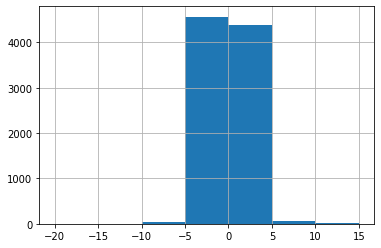

In [ ]:
df = data 
df = df.fillna(method='ffill')
X = df.iloc[:,[-1,-2,-3,-4]].to_numpy()
#X = X.reshape(-1,1)
y = df.iloc[:,-5].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

rf1 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf1.fit(X_train, y_train); 

predictions = rf1.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 
predictions = rf1.predict(data.iloc[:,[-1,-2,-3,-4]].values) 
predictions 
diff = data.iloc[:,-5] - predictions 
bins = list(range(-20,20,5))
diff.hist(bins = bins)  
diff.value_counts(bins = bins) 

In [ ]:
mod_df = df.iloc[:,[-1,-2,-3,-4]]
mod_df.insert(4,"Pred Mod Temp", predictions) 
mod_df  

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp
0,01,01,00,17.8,17.5490
1,01,01,01,17.6,17.3013
2,01,01,02,17.5,17.0757
3,01,01,03,16.5,15.7861
4,01,01,04,16.3,16.2561
...,...,...,...,...,...
9057,01,31,19,23.8,22.9201
9058,01,31,20,21.5,20.0074
9059,01,31,21,20.5,19.4722
9060,01,31,22,19.7,18.8353


Accuracy: 55.02 %.
Mean Absolute Error: 36.55 degrees.


(-5.0, 0.0]         3452
(0.0, 5.0]          1756
(-10.0, -5.0]        271
(5.0, 10.0]          236
(-15.0, -10.0]       200
(10.0, 15.0]         193
(-20.001, -15.0]     153
Name: POA 1 (W/m²), dtype: int64

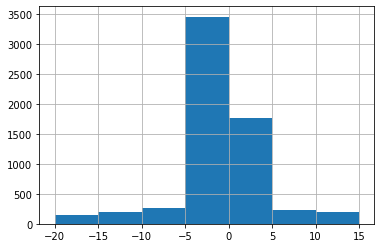

In [ ]:
X = df.iloc[:,[-1,-2,-3,-4,-5]].to_numpy()
#X = X.reshape(-1,1)
y = df.iloc[:,-6].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

rf2 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf2.fit(X_train, y_train); 

predictions = rf2.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 
predictions = rf2.predict(mod_df.values) 
predictions 
diff = data.iloc[:,-6] - predictions 
bins = list(range(-20,20,5))
diff.hist(bins = bins)  
diff.value_counts(bins = bins) 

In [ ]:
POA_df = data.iloc[:,[-1,-2,-3,-4]]
POA_df.insert(4,"Pred Mod Temp", mod_df.iloc[:,-1])
POA_df.insert(5,"Pred POA", predictions) 
POA_df 

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA
0,01,01,00,17.8,17.5490,0.63312
1,01,01,01,17.6,17.3013,0.62976
2,01,01,02,17.5,17.0757,0.62704
3,01,01,03,16.5,15.7861,0.62960
4,01,01,04,16.3,16.2561,0.63104
...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9201,0.48032
9058,01,31,20,21.5,20.0074,0.48032
9059,01,31,21,20.5,19.4722,0.48176
9060,01,31,22,19.7,18.8353,0.48928


Accuracy: 90.43 %.
Mean Absolute Error: 7.66 degrees.


(0.0, 20.0]           3577
(-20.0, 0.0]          2906
(-40.0, -20.0]         439
(20.0, 40.0]           417
(40.0, 60.0]           250
(-60.0, -40.0]         223
(60.0, 80.0]           162
(-80.0, -60.0]         158
(-100.0, -80.0]        113
(80.0, 100.0]          107
(100.0, 120.0]          79
(-120.0, -100.0]        74
(-140.0, -120.0]        67
(120.0, 140.0]          48
(-160.0, -140.0]        44
(140.0, 160.0]          42
(-180.0, -160.0]        36
(-200.001, -180.0]      33
(160.0, 180.0]          17
Name: GHI (W/m²), dtype: int64

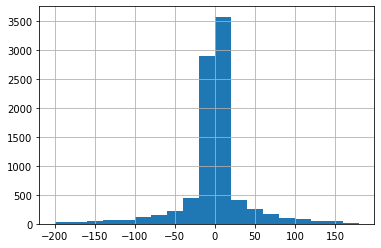

In [ ]:
X = df.iloc[:,[-1,-2,-3,-4,-5,-6]].to_numpy()
#X = X.reshape(-1,1)
y = df.iloc[:,-7].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

rf3 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf3.fit(X_train, y_train); 

predictions = rf3.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 
predictions = rf3.predict(POA_df.values) 
diff = df.iloc[:,-7] - predictions 
bins = list(range(-200,200,20))
diff.hist(bins = bins)  
diff.value_counts(bins = bins) 

In [ ]:
GHI_df = data.iloc[:,[-1,-2,-3,-4]]
GHI_df.insert(4,"Pred Mod Temp", mod_df.iloc[:,-1])
GHI_df.insert(5,"Pred POA", POA_df.iloc[:,-1]) 
GHI_df.insert(6,"Pred GHI", predictions) 
GHI_df 

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA,Pred GHI
0,01,01,00,17.8,17.5490,0.63312,0.32080
1,01,01,01,17.6,17.3013,0.62976,0.32656
2,01,01,02,17.5,17.0757,0.62704,0.32512
3,01,01,03,16.5,15.7861,0.62960,0.41456
4,01,01,04,16.3,16.2561,0.63104,0.37536
...,...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9201,0.48032,0.34032
9058,01,31,20,21.5,20.0074,0.48032,0.31536
9059,01,31,21,20.5,19.4722,0.48176,0.32000
9060,01,31,22,19.7,18.8353,0.48928,0.32000


Accuracy: 99.93 %.
Mean Absolute Error: 0.29 degrees.


(-20.0, 0.0]          3675
(0.0, 20.0]           2731
(20.0, 40.0]           473
(-40.0, -20.0]         382
(40.0, 60.0]           261
(-60.0, -40.0]         234
(60.0, 80.0]           176
(-80.0, -60.0]         143
(80.0, 100.0]          125
(-100.0, -80.0]        104
(-120.0, -100.0]        86
(100.0, 120.0]          82
(-140.0, -120.0]        64
(120.0, 140.0]          53
(-160.0, -140.0]        51
(-180.0, -160.0]        40
(140.0, 160.0]          37
(-200.001, -180.0]      29
(160.0, 180.0]          28
Name: Irradiance ( W/m²), dtype: int64

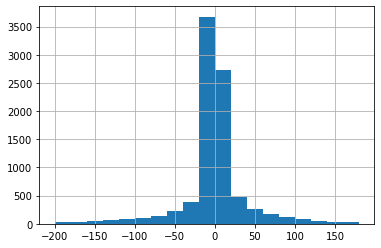

In [ ]:
X = df.iloc[:,[-1,-2,-3,-4,-5,-6,-7]].to_numpy()
#X = X.reshape(-1,1)
y = df.iloc[:,-8].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

rf4 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf4.fit(X_train, y_train); 

predictions = rf4.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 
predictions = rf4.predict(GHI_df.values) 
predictions 
diff = df.iloc[:,-8] - predictions 
bins = list(range(-200,200,20))
diff.hist(bins = bins)  
diff.value_counts(bins = bins) 

In [ ]:
Rad_df = GHI_df.iloc[:,:] 
Rad_df.insert(7,"Pred Irradiance",predictions) 
Rad_df 

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA,Pred GHI,Pred Irradiance
0,01,01,00,17.8,17.5490,0.63312,0.32080,0.64
1,01,01,01,17.6,17.3013,0.62976,0.32656,0.64
2,01,01,02,17.5,17.0757,0.62704,0.32512,0.64
3,01,01,03,16.5,15.7861,0.62960,0.41456,0.64
4,01,01,04,16.3,16.2561,0.63104,0.37536,0.64
...,...,...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9201,0.48032,0.34032,0.48
9058,01,31,20,21.5,20.0074,0.48032,0.31536,0.48
9059,01,31,21,20.5,19.4722,0.48176,0.32000,0.48
9060,01,31,22,19.7,18.8353,0.48928,0.32000,0.48


<ipython-input-14-da981a228ac9>:13: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * (errors / y_test)
<ipython-input-14-da981a228ac9>:13: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * (errors / y_test)


Accuracy: nan %.
Mean Absolute Error: 1101.73 degrees.


(-20.0, 0.0]          4499
(0.0, 20.0]             62
(-60.0, -40.0]          50
(20.0, 40.0]            47
(-40.0, -20.0]          46
(40.0, 60.0]            39
(-120.0, -100.0]        31
(-140.0, -120.0]        30
(60.0, 80.0]            29
(100.0, 120.0]          27
(80.0, 100.0]           26
(-100.0, -80.0]         26
(-80.0, -60.0]          26
(120.0, 140.0]          25
(-200.001, -180.0]      23
(-160.0, -140.0]        23
(160.0, 180.0]          19
(-180.0, -160.0]        17
(140.0, 160.0]          17
Name: Virtual MFM AC Power (kW), dtype: int64

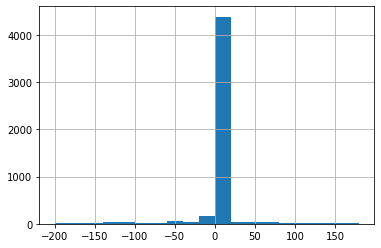

In [ ]:
X = df.iloc[:,[-1,-2,-3,-4,-5,-6,-7,-8]].to_numpy()
#X = X.reshape(-1,1)
y = df.iloc[:,-9].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

from sklearn.ensemble import RandomForestRegressor

rf5 = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf5.fit(X_train, y_train); 

predictions = rf5.predict(X_test)
errors = abs(predictions - y_test)
mape = 100 * (errors / y_test)
accuracyRandForest = 100 - np.mean(mape)
print('Accuracy:', round(accuracyRandForest, 2), '%.')
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.') 
predictions = rf5.predict(Rad_df.values) 
predictions 
diff = df.iloc[:,1] - predictions 
bins = list(range(-200,200,20))
diff.hist(bins = bins)  
diff.value_counts(bins = bins) 

In [ ]:
finale = Rad_df
finale.insert(8,"Pred Power",predictions) 
finale  

,Month,Day,Hour,Amb Temp (°C),Pred Mod Temp,Pred POA,Pred GHI,Pred Irradiance,Pred Power
0,01,01,00,17.8,17.5490,0.63312,0.32080,0.64,0.0000
1,01,01,01,17.6,17.3013,0.62976,0.32656,0.64,0.0000
2,01,01,02,17.5,17.0757,0.62704,0.32512,0.64,0.0000
3,01,01,03,16.5,15.7861,0.62960,0.41456,0.64,0.0000
4,01,01,04,16.3,16.2561,0.63104,0.37536,0.64,0.0000
...,...,...,...,...,...,...,...,...,...
9057,01,31,19,23.8,22.9201,0.48032,0.34032,0.48,0.0546
9058,01,31,20,21.5,20.0074,0.48032,0.31536,0.48,0.0000
9059,01,31,21,20.5,19.4722,0.48176,0.32000,0.48,0.0000
9060,01,31,22,19.7,18.8353,0.48928,0.32000,0.48,0.0000


In [ ]:
pred_df = future_df.iloc[:,[0,1,2,3]]
mod_temp = rf1.predict(pred_df.values).tolist()
pred_df.insert(4,"Mod temp",mod_temp) 
POA = rf2.predict(pred_df).tolist()
pred_df.insert(5,"POA",POA) 
GHI = rf3.predict(pred_df).tolist()
pred_df.insert(6,"GHI",GHI)
Irrad = rf4.predict(pred_df).tolist()
pred_df.insert(7,"Irradiance",Irrad)
Power = rf5.predict(pred_df).tolist()
pred_df.insert(8,"Power",Power)   
pred_df 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Month,Day,Hour,Temperature,Mod temp,POA,GHI,Irradiance,Power
0,2.0,18.0,13.0,34.4,54.808600,1025.28576,903.84736,1025.51760,46982.8818
1,2.0,18.0,14.0,34.4,54.034513,950.41232,812.99984,950.39440,43456.4534
2,2.0,18.0,15.0,35.0,50.933700,813.50960,670.38320,813.12960,37609.2680
3,2.0,18.0,16.0,35.0,45.670200,522.57904,439.14288,522.85472,24014.6309
4,2.0,18.0,17.0,33.9,37.490100,233.55232,204.58624,233.33632,10524.9841
...,...,...,...,...,...,...,...,...,...
187,2.0,25.0,8.0,23.3,25.268100,293.88656,250.39264,293.79536,13369.5625
188,2.0,25.0,9.0,26.7,32.874200,484.34736,455.02816,484.56800,23703.4999
189,2.0,25.0,10.0,29.4,44.458600,789.55712,686.83072,789.04432,37707.0476
190,2.0,25.0,11.0,31.1,48.767100,862.44576,774.78592,862.75008,41948.3717


In [ ]:
pred_df[pred_df["Day"] == 19].sort_values(by=["Hour"])  

,Month,Day,Hour,Temperature,Mod temp,POA,GHI,Irradiance,Power
36,2.0,19.0,1.0,22.2,21.671100,0.48000,0.44032,0.48000,0.0000
37,2.0,19.0,2.0,21.7,20.971800,0.48000,0.32032,0.48000,0.0000
38,2.0,19.0,3.0,21.1,20.228800,0.48096,0.32000,0.48000,0.0000
39,2.0,19.0,4.0,20.6,19.474900,0.48032,0.32000,0.48000,0.0000
40,2.0,19.0,5.0,20.0,19.034700,0.48336,0.32000,0.48000,0.0000
41,2.0,19.0,6.0,20.0,19.105200,0.54448,0.31952,0.48000,0.0000
42,2.0,19.0,7.0,20.6,19.539800,34.83328,27.72576,34.87904,1049.5378
43,2.0,19.0,8.0,23.3,24.640800,238.59104,211.68016,238.60928,10939.7428
44,2.0,19.0,9.0,26.7,33.332900,464.14912,421.02480,464.64016,22490.5686
45,2.0,19.0,10.0,29.4,45.120300,793.94240,692.33008,793.59312,36509.6077


In [ ]:
pred_df[pred_df["Day"] == 20].sort_values(by=["Hour"])  

,Month,Day,Hour,Temperature,Mod temp,POA,GHI,Irradiance,Power
60,2.0,20.0,1.0,22.2,21.677200,0.48000,0.44192,0.48000,0.0000
61,2.0,20.0,2.0,21.7,20.947200,0.48000,0.32032,0.48000,0.0000
62,2.0,20.0,3.0,21.1,20.167200,0.48096,0.32000,0.48000,0.0000
63,2.0,20.0,4.0,20.6,19.501800,0.48032,0.32000,0.48000,0.0000
64,2.0,20.0,5.0,20.0,19.034800,0.48336,0.32000,0.48000,0.0000
65,2.0,20.0,6.0,20.0,19.103100,0.53632,0.31952,0.48000,0.0000
66,2.0,20.0,7.0,20.6,19.575600,36.52592,28.32176,36.49440,1121.1496
67,2.0,20.0,8.0,23.3,24.573000,248.74240,221.05888,248.54832,11388.3917
68,2.0,20.0,9.0,26.7,33.295400,464.04192,422.43568,464.52048,22462.2788
69,2.0,20.0,10.0,29.4,45.108200,785.04064,688.53712,784.96176,38049.3879


In [ ]:
pred_df = data.iloc[:,[-1,-2,-3,-4]] 
mod_temp = rf1.predict(pred_df.values).tolist()
pred_df.insert(4,"Mod temp",mod_temp) 
POA = rf2.predict(pred_df).tolist()
pred_df.insert(5,"POA",POA) 
GHI = rf3.predict(pred_df).tolist()
pred_df.insert(6,"GHI",GHI)
Irrad = rf4.predict(pred_df).tolist()
pred_df.insert(7,"Irradiance",Irrad)
Power = rf5.predict(pred_df).tolist()
pred_df.insert(8,"Predicted_Power",Power)   
pred_df.insert(9,"Original Power",data.iloc[:,1]) 
per = []
for i in range(len(pred_df)):
  if pred_df.iloc[i,-2] !=0 and pred_df.iloc[i,-1] !=0:
    temp = abs(pred_df.iloc[i,-2] - pred_df.iloc[i,-1])
    per.append(temp/pred_df.iloc[i,-1]) 
per = [s*100 for s in per]
err =sum(per)/len(per)
100 - err

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


68.56456559591932

In [ ]:
import datetime 

In [ ]:
datag = data[data.Time.dt.date >= datetime.date(2022,2,1)]
dataf = datag[datag.Time.dt.date <= datetime.date(2022,2,28)]
dataf 

,Time,Virtual MFM AC Power (kW),Irradiance ( W/m²),GHI (W/m²),POA 1 (W/m²),Mod Temp 1 (°C),Amb Temp (°C),Hour,Day,Month
728,2022-02-01 01:00:00,0.0,0.64,0.32,0.64,16.4,17.7,01,01,02
729,2022-02-01 02:00:00,0.0,0.64,0.48,0.64,15.7,16.5,02,01,02
730,2022-02-01 03:00:00,0.0,0.64,0.48,0.64,14.9,16.5,03,01,02
731,2022-02-01 04:00:00,0.0,0.64,0.48,0.64,14.5,15.6,04,01,02
732,2022-02-01 05:00:00,0.0,0.64,0.48,0.64,14.0,14.4,05,01,02
...,...,...,...,...,...,...,...,...,...,...
1352,2022-02-28 19:00:00,0.0,0.48,0.32,0.48,23.2,25.5,19,28,02
1353,2022-02-28 20:00:00,0.0,0.48,0.32,0.48,22.3,24.3,20,28,02
1354,2022-02-28 21:00:00,0.0,0.48,0.32,0.48,20.7,23.0,21,28,02
1355,2022-02-28 22:00:00,0.0,0.48,0.32,0.48,22.5,23.8,22,28,02


In [ ]:
pred_df = dataf.iloc[:,[-1,-2,-3,-4]] 
#pred_df = data[data.Time.dt.date == datetime.date(2022,5,22)].iloc[:,[-1,-2,-3,-4]] 
mod_temp = rf1.predict(pred_df).tolist()
pred_df.insert(4,"Mod temp",mod_temp) 
POA = rf2.predict(pred_df).tolist()
pred_df.insert(5,"POA",POA) 
GHI = rf3.predict(pred_df).tolist() 
pred_df.insert(6,"GHI",GHI)
Irrad = rf4.predict(pred_df).tolist()
pred_df.insert(7,"Irradiance",Irrad)
Power = rf5.predict(pred_df).tolist()
pred_df.insert(8,"Predicted_Power",Power) 
pred_df.insert(9,"Original Power",data.iloc[:,1]) 
pred_df 

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,Month,Day,Hour,Amb Temp (°C),Mod temp,POA,GHI,Irradiance,Predicted_Power,Original Power
728,02,01,01,17.7,16.4306,0.63040,0.34016,0.64,0.0,0.0
729,02,01,02,16.5,15.2113,0.63888,0.45840,0.64,0.0,0.0
730,02,01,03,16.5,15.2640,0.63776,0.45600,0.64,0.0,0.0
731,02,01,04,15.6,14.6131,0.63632,0.43504,0.64,0.0,0.0
732,02,01,05,14.4,13.6284,0.63680,0.47488,0.64,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1352,02,28,19,25.5,23.5232,0.48000,0.31968,0.48,0.0,0.0
1353,02,28,20,24.3,22.5321,0.48000,0.32000,0.48,0.0,0.0
1354,02,28,21,23.0,21.0887,0.48000,0.32000,0.48,0.0,0.0
1355,02,28,22,23.8,22.5868,0.48000,0.31984,0.48,0.0,0.0


In [ ]:
pred_df[pred_df["Day"] == '01'] 

,Month,Day,Hour,Amb Temp (°C),Mod temp,POA,GHI,Irradiance,Predicted_Power,Original Power
728,02,01,01,17.7,16.4306,0.63040,0.34016,0.64000,0.0000,0.0
729,02,01,02,16.5,15.2113,0.63888,0.45840,0.64000,0.0000,0.0
730,02,01,03,16.5,15.2640,0.63776,0.45600,0.64000,0.0000,0.0
731,02,01,04,15.6,14.6131,0.63632,0.43504,0.64000,0.0000,0.0
732,02,01,05,14.4,13.6284,0.63680,0.47488,0.64000,0.0000,0.0
733,02,01,06,14.1,13.1806,0.63696,0.47552,0.64000,0.0000,0.0
734,02,01,07,14.3,13.9208,21.34960,16.46608,21.30160,513.7290,488.9
735,02,01,08,22.5,24.7081,168.34208,163.42112,168.03488,7020.0533,10769.2
736,02,01,09,29.0,36.5677,513.95184,474.66288,514.18288,26094.8753,25447.6
737,02,01,10,29.6,44.3799,763.82848,690.63216,763.57120,35972.7687,36914.1


In [ ]:
print(sum(pred_df.iloc[:,9]),sum(pred_df.iloc[:,8])) 

9102865.800000003 8815167.360700006


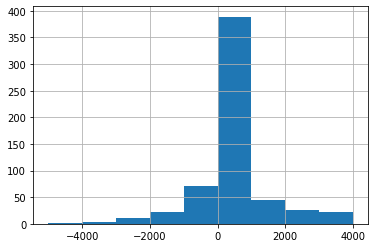

In [ ]:
outputs = list(pred_df.iloc[:,-1] - pred_df.iloc[:,-2]) 
outputdiff = pd.Series(outputs)
bins = range(-5000,5000,1000) 
outputdiff.hist(bins=bins)  

In [ ]:
sub = [] 
per = []
for i in range(len(pred_df)):
  if pred_df.iloc[i,-2] !=0 and pred_df.iloc[i,-1] !=0:
    temp = abs(pred_df.iloc[i,-2] - pred_df.iloc[i,-1])
    per.append(temp/pred_df.iloc[i,-1]) 
per = [s*100 for s in per] 

In [1]:
err =sum(per)/len(per)
100 - err

94.83
